# Linear Regression - Coding Exercises

## Conding exercises for Linear Regression

### Import the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1 - Plot the data

Create numpy arrays with the data

In [2]:
flowers = np.array([150, 250, 100, 300, 180, 320, 200, 275, 230, 350])
bees = np.array([30, 48, 22, 60, 36, 65, 42, 54, 45, 70])

Code to plot the data

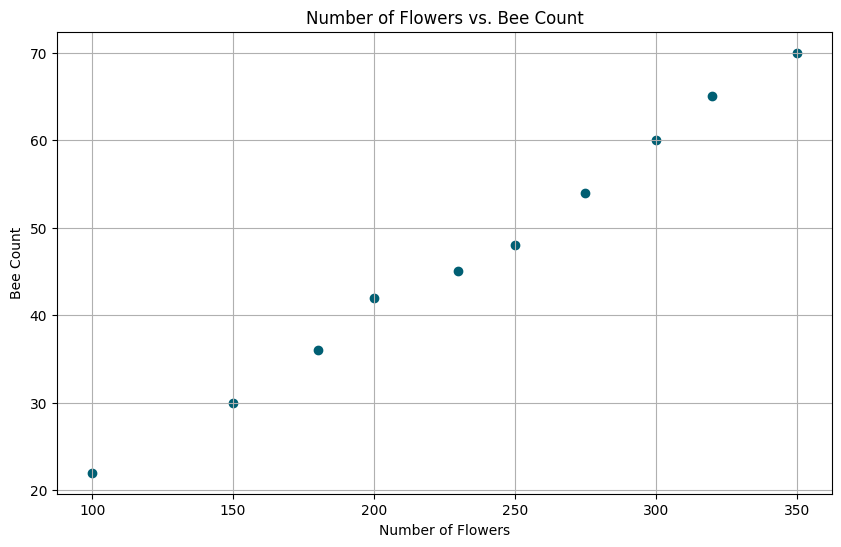

In [3]:
# Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(flowers, bees, color='#005F73', marker='o')
plt.title('Number of Flowers vs. Bee Count')
plt.xlabel('Number of Flowers')
plt.ylabel('Bee Count')
plt.grid(True)
plt.show()

### 2 - Univariable Linear Regression:

Linear regression is a statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables. The simplest form of the regression equation with one dependent and one independent variable is defined by the formula:

$$ y = \beta_0 + \beta_1x $$

Where:
-  $ y $ is the predicted value of the dependent variable.
-  $ x $ is the independent variable.
-  $ \beta_0 $ is the y-intercept.
-  $ \beta_1 $ is the slope of the line.

For our dataset:
-  $ y $ is the "Bee Count".
-  $ x $ is the "Number of Flowers".

We will be using the Gradient Descent (GD) optimization algorithm to find the best values for $ \beta_0 $ and $ \beta_1 $ that minimize the mean squared error (MSE). 

MSE is calculated using the formula:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $ y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value by the model.
- $ n $ is the number of observations.

### 2 - Univariable Linear Regression - Python function :
The `linearRegression` function uses gradient descent to fit a linear model to the provided data $x$ and $y$. It initializes coefficients, iterates to adjust them based on the error between predicted and actual values, and then returns the optimized coefficients and the model's mean squared error (MSE).


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform gradient descent
def linear_regression_gd(x, y, learning_rate=0.01, num_iterations=1000):
    """
    Perform linear regression using gradient descent.

    Parameters:
    x : numpy array
        Independent variable data.
    y : numpy array
        Dependent variable data.
    learning_rate : float
        The learning rate for gradient descent.
    num_iterations : int
        Number of iterations for the gradient descent algorithm.

    Returns:
    beta_0 : float
        Optimized intercept.
    beta_1 : float
        Optimized slope.
    mse : float
        Mean squared error of the model.
    """
    # Number of observations
    n = len(x)
    
    # Initialize parameters (intercept and slope)
    beta_0 = 0
    beta_1 = 0

    # Iterate over the number of iterations specified
    for _ in range(num_iterations):
        # Predicted value of y based on current beta values
        y_pred = beta_0 + beta_1 * x
        
        # Calculate gradients for intercept and slope
        d_beta_0 = (-2 / n) * np.sum(y - y_pred)
        d_beta_1 = (-2 / n) * np.sum((y - y_pred) * x)
        
        # Update the parameters using the gradients and learning rate
        beta_0 -= learning_rate * d_beta_0
        beta_1 -= learning_rate * d_beta_1

    # Calculate the final predicted values of y
    y_pred = beta_0 + beta_1 * x

    # Calculate the MSE using the final predicted values
    mse = np.mean((y - y_pred) ** 2)

    return beta_0, beta_1, mse


### 2 - Univariable Linear Regression - Run function and prompt the results :

In [5]:
beta_0_original, beta_1_original, MSE_original = linear_regression_gd(flowers, bees, learning_rate=0.00001, num_iterations=10000)

print(f"Optimized beta_0 (intercept): {beta_0_original}")
print(f"Optimized beta_1 (slope): {beta_1_original}")
print(f"Mean Squared Error (MSE): {MSE_original}")


Optimized beta_0 (intercept): 0.027067451850083135
Optimized beta_1 (slope): 0.19975649518878555
Mean Squared Error (MSE): 1.4916970499825086


### 2 - Univariable Linear Regression - Plot the regression line and the original points:

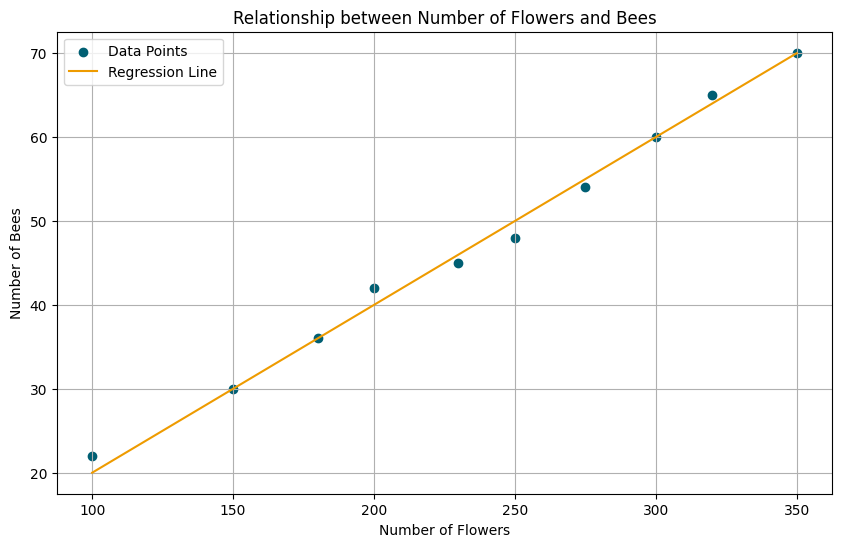

In [6]:

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(flowers, bees, color='#005F73', label='Data Points')  # darkBlue color

# Calculate the values on the regression line
x_values = np.linspace(min(flowers), max(flowers), 100)
y_values = beta_0_original + beta_1_original * x_values

# Plot the regression line
plt.plot(x_values, y_values, color='#EE9B00', label='Regression Line')  # coolYellow color

# Add labels, legend, and show plot
plt.xlabel('Number of Flowers')
plt.ylabel('Number of Bees')
plt.title('Relationship between Number of Flowers and Bees')
plt.legend()
plt.grid(True)
plt.show()


### 3 - Data Transformation:

Often in regression, we encounter data that doesn't fit a linear relationship. Such non-linearities can sometimes be addressed by transforming the data. The transformation can help stabilize variances, make the data more normal distribution-like, and make the relationship between variables more linear.

One common transformation method is the **natural logarithm (log)**. By applying the logarithm transformation, we can convert exponential growth to linear growth, which often simplifies analyses.

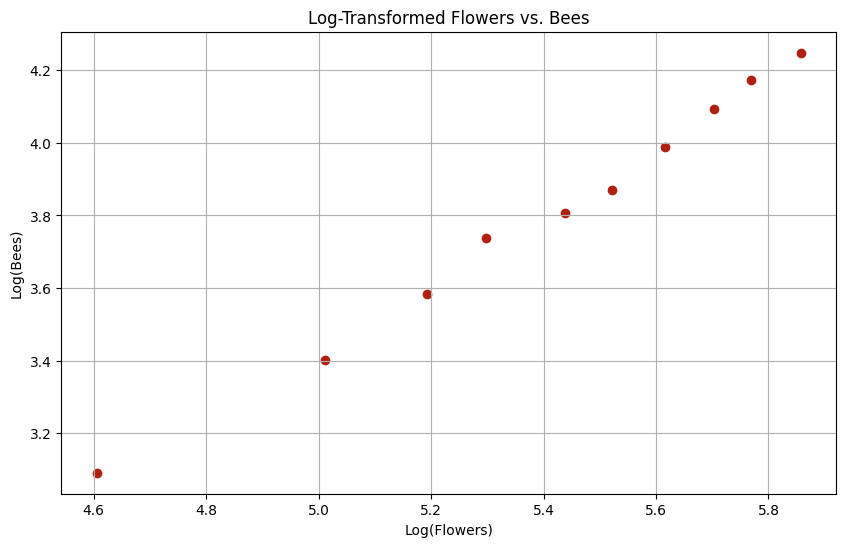

In [7]:
# Transform the data using the natural logarithm
log_flowers = np.log(flowers)
log_bees = np.log(bees)

# Plot the transformed data
plt.figure(figsize=(10,6))
plt.scatter(log_flowers, log_bees, color='#AE2012')
plt.title('Log-Transformed Flowers vs. Bees')
plt.xlabel('Log(Flowers)')
plt.ylabel('Log(Bees)')
plt.grid(True)
plt.show()

### 4 - Univariable Linear Regression - application of the  `linearRegression`  on the log scaled data:

The code applies `linearRegression` to log-transformed flower and bee data, prints the optimized coefficients and MSE for this transformed model, and compares its MSE to the original model's MSE. It then prints which model (original or log-transformed) fits the data better based on the MSE comparison.


In [8]:
beta_0_log, beta_1_log, MSE_log = linear_regression_gd(log_flowers, log_bees, learning_rate=0.01, num_iterations=10000)

print(f"Optimized beta_0_log (intercept): {beta_0_log}")
print(f"Optimized beta_1_log (slope): {beta_1_log}")
print(f"Mean Squared Error (MSE) for log: {MSE_log}")

#scale back the error to compare both MSE 
log_predicted_bees = beta_0_log + beta_1_log * np.log(flowers)
predicted_bees_original_scale = np.exp(log_predicted_bees)
MSE_log_transformed_back = np.mean((bees - predicted_bees_original_scale) ** 2)
print(f"Mean Squared Error (MSE) for scaled logs: {MSE_log_transformed_back}")
print(f"Difference in MSE between models: {MSE_original - MSE_log_transformed_back}")

# If MSE for the transformed model is lower, it indicates a better fit
if MSE_log_transformed_back < MSE_original:
    print("The model on the log-transformed data fits better.")
else:
    print("The model on the original data fits better.")

Optimized beta_0_log (intercept): -0.6861034581786158
Optimized beta_1_log (slope): 0.8309750511453439
Mean Squared Error (MSE) for log: 0.002315277843315088
Mean Squared Error (MSE) for scaled logs: 5.839651503306518
Difference in MSE between models: -4.347954453324009
The model on the original data fits better.


### 4 - Univariable Linear Regression - Plot the scaled points and the new regression line:

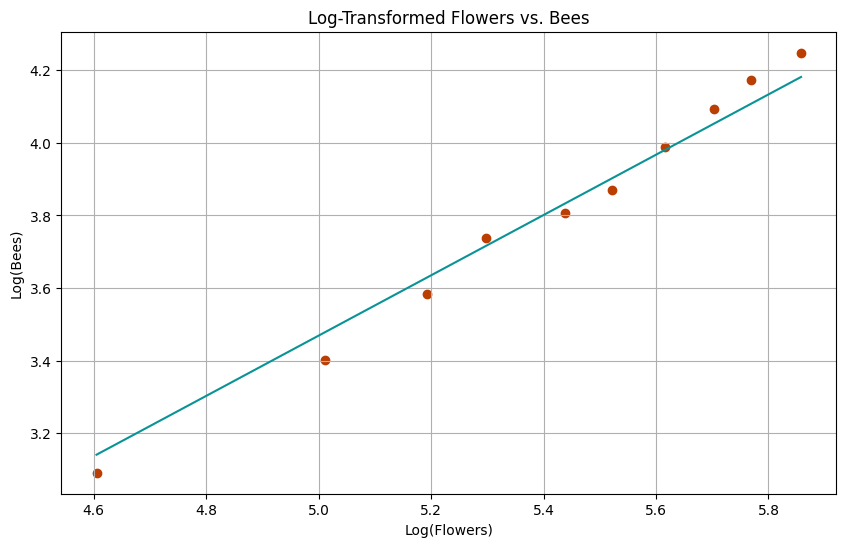

In [9]:
# Calculate the values on the regression line
x_values_log = np.linspace(min(log_flowers), max(log_flowers), 100)
y_values_log = beta_0_log + beta_1_log * x_values_log

# Plot the transformed data
plt.figure(figsize=(10,6))
plt.scatter(log_flowers, log_bees, color='#BB3E03')
# Plot the regression line
plt.plot(x_values_log, y_values_log, color='#0A9396', label='Regression Line')  
plt.title('Log-Transformed Flowers vs. Bees')
plt.xlabel('Log(Flowers)')
plt.ylabel('Log(Bees)')
plt.grid(True)
plt.show()

### 5 - Interpretation of Regression Coefficients:

The coefficients of a linear regression model provide insight into the relationship between the independent and dependent variables. In the context of our problem:

- $\beta_0 $ (Intercept): Represents the expected value of the dependent variable when the independent variable is 0.
- $ \beta_1 $ (Slope): Denotes the change in the dependent variable for a unit change in the independent variable.

When we transformed our data using the natural logarithm, the nature of these coefficients and their implications might have changed. Interpreting and comparing the coefficients from both the original and transformed data models will help us understand the underlying relationship between the advertising budget and sales better.


In [10]:

print(f"Coefficients for the original data model:")
print(f"Intercept (beta_0_original): {beta_0_original}")
print(f"Slope (beta_1_original): {beta_1_original}")

print("\n")

print(f"Coefficients for the log-transformed data model:")
print(f"Intercept (beta_0_log): {beta_0_log}")
print(f"Slope (beta_1_log): {beta_1_log}")

# Interpretation based on the coefficients
if beta_1_log > beta_1_original:
    print("\nThe slope for the log-transformed data model is steeper, indicating a stronger relationship between Flowers budget and the bees.")
else:
    print("\nThe slope for the original data model is steeper, indicating a stronger relationship between Flowers and bees transformation.")


Coefficients for the original data model:
Intercept (beta_0_original): 0.027067451850083135
Slope (beta_1_original): 0.19975649518878555


Coefficients for the log-transformed data model:
Intercept (beta_0_log): -0.6861034581786158
Slope (beta_1_log): 0.8309750511453439

The slope for the log-transformed data model is steeper, indicating a stronger relationship between Flowers budget and the bees.


## Conding exercises for Multivariate Linear Regression:

### 1 - Multivariate Linear Regression:

The general form of the regression equation with one dependent and multiple independent variables is defined by the formula:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... $$

Where:
- $ y $ is the predicted value of the dependent variable.
- $ x_1, x_2, ... $ are the independent variables.
- $ \beta_0 $ is the $y$-intercept.
- $ \beta_1, \beta_2, ... $ are the coefficients of the independent variables.

For our dataset:
- $ y $ is the "Bee Count".
- $ x_1 $ is the "Number of Flowers".
- $ x_2 $ is the "Average Temperature".

We will be using the Gradient Descent (GD) optimization algorithm to find the best values for $ \beta_0, \beta_1 $ and $ \beta_2 $ that minimize the mean squared error (MSE). 

MSE is calculated using the formula:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $ y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value by the model.
- $ n $ is the number of observations.



### Create numpy arrays with the data:

In [11]:
X_flowers = np.array([150, 250, 100, 300, 180, 320, 200, 275, 230, 350])
X_temp = np.array([20, 23, 18, 25, 21, 26, 22, 24, 23, 27])
y = np.array([30, 48, 22, 60, 36, 65, 42, 54, 45, 70])

### Log scale the data:

In [12]:
X_flowers_log = np.log(X_flowers)
X_temp_log = np.log(X_temp)
y_log = np.log(y)

The `multivariate_regression` function utilizes gradient descent to fit a linear model to provided data sets: `X_flowers` (number of flowers), `X_temp` (average temperature), and `y` (bee count). After initializing the coefficients, the function iteratively adjusts them based on the differences between predicted and actual bee counts. Following the optimization, it returns the best-fit coefficients (theta values) and the model's mean squared error (MSE).


### 1 -  Multivariate Linear Regression - Python function :

In [13]:
def multivariate_regression(X_flowers, X_temp, y, alpha=0.0001, iterations=1000):
    """
    Multivariate linear regression using gradient descent.
    
    Parameters:
        X_flowers (array): Number of flowers data.
        X_temp (array): Average temperature data.
        y (array): Bee count data.
        alpha (float): Learning rate.
        iterations (int): Number of gradient descent iterations.
    
    Returns:
        tuple: Optimized beta values and MSE.
    """
    # Add a bias term (X0 = 1 for all examples)
    X0 = np.ones(len(X_flowers))
    X = np.stack((X0, X_flowers, X_temp), axis=1)

    # Initializing parameters
    theta = np.zeros(3)

    # Gradient Descent for Multivariate Linear Regression
    m = len(y)
    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = np.dot(X.T, errors) / m
        theta = theta - alpha * gradient

    # Predictions using the optimized theta values
    predictions = np.dot(X, theta)

    # Calculating MSE
    mse = np.mean((predictions - y) ** 2)
    
    return theta, mse

### 1 - Multivariate Linear Regression - Run function and prompt the results :

In [14]:
betas, mse_value = multivariate_regression(X_flowers_log, X_temp_log, y_log)
print(f"Optimized beta values: {betas}")
print(f"Mean Squared Error: {mse_value}")


Optimized beta values: [0.0925804  0.50642371 0.2913101 ]
Mean Squared Error: 0.019655872346007856


### 2 - Interpertation:

In [15]:
print(f"[Log-transformed Data] Optimized beta values: {betas}")
print(f"[Log-transformed Data] Mean Squared Error: {mse_value}\n")

# 3. Interpretation
print("Interpretation:")
print("The coefficient for 'Number of Flowers' after transformation is:", betas[1])
print("The coefficient for 'Average Temperature' after transformation is:", betas[2])
print("\nThe inclusion of the average temperature as a variable means its coefficient represents the average change in bee count (in log-scale) for a unit change in average temperature (also in log-scale), holding the number of flowers constant. A positive coefficient suggests a positive relationship, while a negative one suggests an inverse relationship.")


[Log-transformed Data] Optimized beta values: [0.0925804  0.50642371 0.2913101 ]
[Log-transformed Data] Mean Squared Error: 0.019655872346007856

Interpretation:
The coefficient for 'Number of Flowers' after transformation is: 0.5064237084732837
The coefficient for 'Average Temperature' after transformation is: 0.29131009715844364

The inclusion of the average temperature as a variable means its coefficient represents the average change in bee count (in log-scale) for a unit change in average temperature (also in log-scale), holding the number of flowers constant. A positive coefficient suggests a positive relationship, while a negative one suggests an inverse relationship.


## Conding exercises for Polynomial Regression:

### 1 - Data visualization:

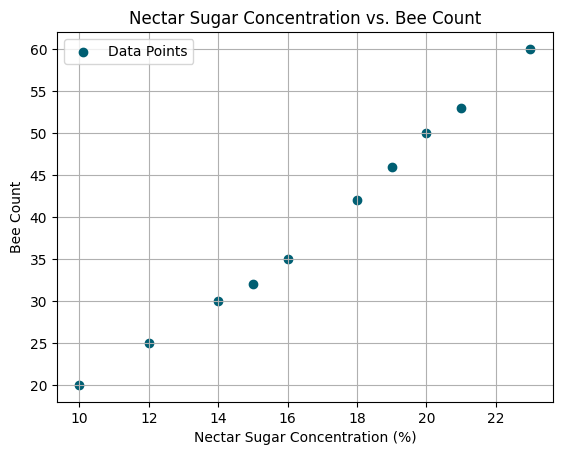

In [16]:
# Given data
X_sugar_concentration = np.array([10, 12, 14, 15, 16, 18, 19, 20, 21, 23])
y_bee_count = np.array([20, 25, 30, 32, 35, 42, 46, 50, 53, 60])

# Scatter plot
plt.scatter(X_sugar_concentration, y_bee_count, color='#005F73', marker='o', label='Data Points')
plt.title('Nectar Sugar Concentration vs. Bee Count')
plt.xlabel('Nectar Sugar Concentration (%)')
plt.ylabel('Bee Count')
plt.legend()
plt.grid(True)
plt.show()


### 2 - Linear Regression:

In [17]:
X_log_transformed = np.log(X_sugar_concentration)
y_bee_count_transformed =  np.log(y_bee_count)

beta_0, beta_1, MSE = linear_regression_gd(X_log_transformed, y_bee_count_transformed)

print(f"Optimized beta_0 (intercept): {beta_0}")
print(f"Optimized beta_1 (slope): {beta_1}")
print(f"Mean Squared Error (MSE): {MSE}")

Optimized beta_0 (intercept): 0.34033224223114755
Optimized beta_1 (slope): 1.1751894791663235
Mean Squared Error (MSE): 0.002197320153895039


### 2 - Linear Regression Plot:

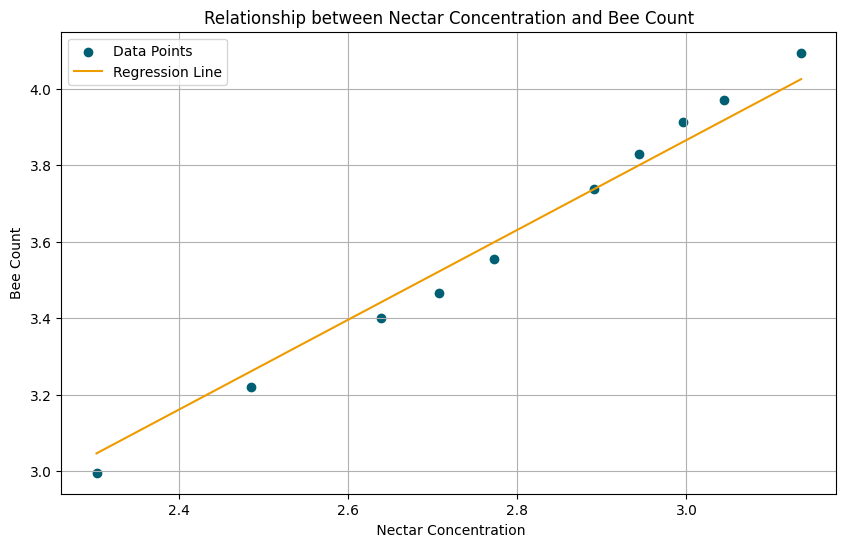

In [18]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X_log_transformed, y_bee_count_transformed, color='#005F73', label='Data Points')  # darkBlue color

# Calculate the values on the regression line
x_values = np.linspace(min(X_log_transformed), max(X_log_transformed), 100)
y_values = beta_0 + beta_1 * x_values

# Plot the regression line
plt.plot(x_values, y_values, color='#EE9B00', label='Regression Line')  # coolYellow color

# Add labels, legend, and show plot
plt.xlabel(' Nectar Concentration')
plt.ylabel('Bee Count')
plt.title('Relationship between Nectar Concentration and Bee Count')
plt.legend()
plt.grid(True)
plt.show()


### 3 - Polynomial Regression:

Polynomial regression is a type of linear regression where the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an nth degree polynomial. For a quadratic polynomial regression (degree 2), the formula is:

$$ y = \beta_0 + \beta_1x + \beta_2x^2 $$

Where:
- $ y $ is the predicted value of the dependent variable.
- $ x $ is the independent variable.
- $ \beta_0 $ is the $y$-intercept.
- $ \beta_1 $ is the coefficient of the linear term.
- $ \beta_2 $ is the coefficient of the quadratic term.

For our dataset:
- $ y $ is the "Bee Count".
- $ x $ is the "Nectar Sugar Concentration".

We will use the Gradient Descent (GD) optimization algorithm to find the optimal values for $ \beta_0, \beta_1 $ and $ \beta_2 $ that minimize the mean squared error (MSE). 

MSE is given by:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Where:
- $ y_i $ is the actual value.
- $ \hat{y}_i $ is the predicted value by the model.
- $ n $ is the number of observations.


### 3 -  Polynomial Regression: - Python function :

In [19]:
def polynomial_regression_newton(X, y, epochs=1000):
    """
    Performs polynomial regression (Quadratic) using gradient descent. This function
    models the relationship between bee counts and the nectar sugar concentration, 
    represented as a quadratic relationship.

    Parameters:
        X (array): Array of nectar sugar concentrations (or its transformations), the predictor variable.
        y (array): Array of bee count data, the dependent variable.
        learning_rate (float, optional): Learning rate for gradient descent. Default is 0.01.
        epochs (int, optional): Number of iterations (or epochs) for the gradient descent. Default is 100000.
    
    Returns:
        tuple: Contains the optimized theta coefficients for the intercept, linear, 
               and quadratic terms, and the mean squared error (MSE) of the model.
    """    
    # Initialize parameters beta to [0, 0, 0]
    beta = np.zeros(3)
    
    m = len(y)
    
    for _ in range(epochs):
        # Predicted y values based on current coefficients
        y_pred = beta[0] + beta[1] * X + beta[2] * (X**2)
        residuals = y_pred - y
        
        # Compute gradient (first derivative) of the loss function
        gradient = np.array([
            np.mean(residuals),
            np.mean(residuals * X),
            np.mean(residuals * (X**2))
        ])
        
        # Compute Hessian (second derivative) of the loss function
        hessian = np.array([
            [m, np.sum(X), np.sum(X**2)],
            [np.sum(X), np.sum(X**2), np.sum(X**3)],
            [np.sum(X**2), np.sum(X**3), np.sum(X**4)]
        ]) / m
        
        # Update coefficients using Newton's method
        beta -= np.linalg.inv(hessian).dot(gradient)
    
    # Compute the Mean Squared Error (MSE)
    mse = np.mean(residuals**2)
    
    return beta[0], beta[1], beta[2], mse


### 3 - Polynomial Regression - Run function and prompt the results :

In [20]:
beta_0,beta_1, beta_2, mse = polynomial_regression_newton(X_log_transformed, y_bee_count_transformed)
print(f"Optimized beta_0 : {beta_0}")
print(f"Optimized beta_1 : {beta_1}")
print(f"Optimized beta_2: {beta_2}")
print(f"Mean Squared Error (MSE): {mse}")

Optimized beta_0 : 2.193643098850351
Optimized beta_1 : -0.3721052394897899
Optimized beta_2: 0.31353729986251017
Mean Squared Error (MSE): 0.00016677026575881532


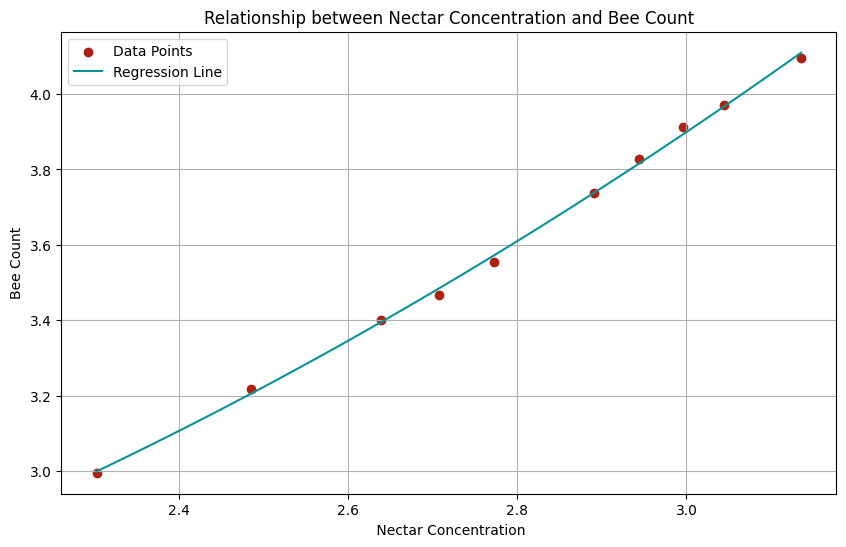

In [21]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X_log_transformed, y_bee_count_transformed, color='#AE2012', label='Data Points')  # darkBlue color

# Calculate the values on the regression line
x_values = np.linspace(min(X_log_transformed), max(X_log_transformed), 100)
y_values = beta_0 + beta_1 * x_values + beta_2*x_values**2

# Plot the regression line
plt.plot(x_values, y_values, color='#0A9396', label='Regression Line')  # coolYellow color

# Add labels, legend, and show plot
plt.xlabel(' Nectar Concentration')
plt.ylabel('Bee Count')
plt.title('Relationship between Nectar Concentration and Bee Count')
plt.legend()
plt.grid(True)
plt.show()

### 4 - Model Interpertation
### Linear Model:
- **Intercept ($\beta_0$)**: When the sugar concentration is zero (or the lowest observed value), the expected bee count is approximately 4.655.
- **Slope ($\beta_1$)**: For each unit increase in sugar concentration, there's an expected increase of approximately 15.367 in the bee count.

### Polynomial Model:
- **Intercept ($\beta_0$)**: When the sugar concentration is zero (or the lowest observed value), the expected bee count is approximately 2.194.
- **Linear Term ($\beta_1$)**: This coefficient is negative, suggesting that the bee count initially decreases as sugar concentration increases.
- **Quadratic Term ($\beta_2$)**: The positive value indicates that there's a parabolic relationship with the bee count and sugar concentration. The bee count might decrease at first (due to the negative $\beta_1$) but then start increasing at a certain point (thanks to the positive $\beta_2$), forming an upward-facing parabola.

## Importance and Contribution of the Quadratic Term

The quadratic term is crucial for capturing the non-linear relationship between the bee count and sugar concentration. Its presence indicates that a simple linear relationship (like "as sugar concentration increases, bee count always increases or decreases") doesn't fit the data well. Instead, the behavior changes depending on the sugar concentration level. This could suggest that initially, too much sugar might deter bees, but after a certain concentration, it becomes more attractive, leading to a higher bee count.

## Comparison to the Linear Model

A significant indication of the superiority of one model over another is the MSE. The polynomial model's MSE is vastly smaller (0.00016677026575881532) compared to the linear model's MSE (325.1478400989973). This stark difference in MSE signifies that the polynomial model fits the data much better than the linear model. The quadratic term provides the flexibility needed to better adhere to the observed data points.

In summary, while the linear model suggests a constant increase in bee count with sugar concentration, the polynomial model paints a more nuanced picture, indicating a potential initial decline followed by an increase in bee count as sugar concentration rises. Given the MSE values, the polynomial model is a much better fit for this data.
